<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Betsy Torres | Daniel Castillo

**Fecha:** 24 octubre 2020.

**Expediente** : 714095 | .
**Profesor:** Oscar David Jaramillo Zuluaga.

**Liga GitHub:** https://github.com/BetsyTorres/ProyectoConjunto_BTorres_DCastillo/blob/master/Tarea_7.ipynb
    
# Tarea 7: Clase 14 & 15

### <font color = 'red'> Enunciado de la tarea:

### Ejercicio 1 
    
Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
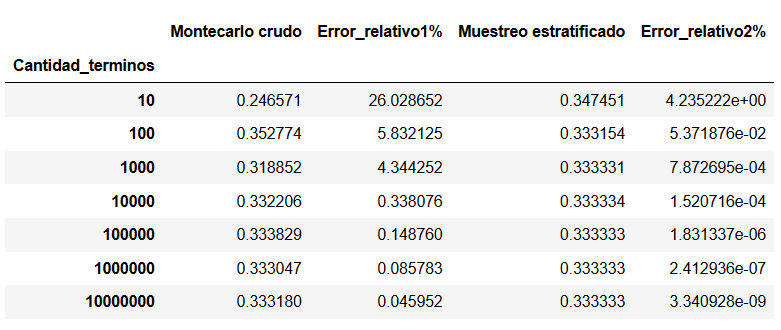
    

### Ejercicio 2
    
**Basandote en el ejercicio anterior**
    
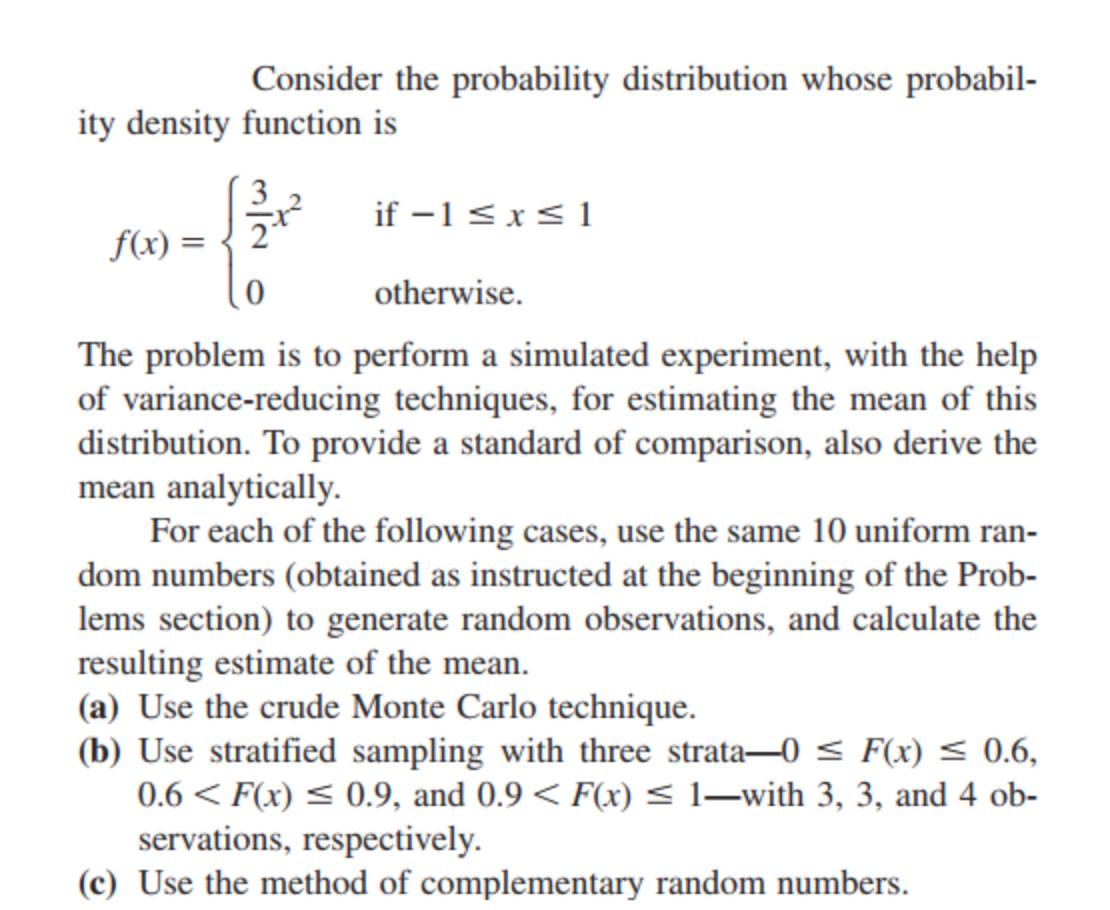

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.


In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

## Sol 1 Betsy Torres 

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

def m_est(B:'Número de estratos'):
    '''
    Esta función realiza  el método de muestreo estratíficado, recibiendo como único 
    parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas 
    correspondientes.
    '''
    m_est = np.random.rand(B)
    i = np.arange(0,B)
    return (m_est+i)/B

I = 1/3

# intervalo de integración
a, b = 0, 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1, 7, 7,dtype = int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo_Crudo', 'Error_relativo de 1%', \
                                   'Muestreo_Estratificado', 'Error_relativo de 2%'], dtype='float')
df.index.name = "Cantidad_términos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a, b , N), N))

ui_e = list(map(lambda x: m_est(x), N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))
fx = lambda x: x**2
I_m_estr = list(map(lambda Y:fx(Y),ui_e))
I_m_estr = list(map(lambda Y:np.mean(Y),I_m_estr))


# Mostramos los resultados en la tabla previamente creada
df.loc[N,'Montecarlo_Crudo'] = I_m
df.loc[N,"Error_relativo de 1%"] = np.abs(df.loc[N,"Montecarlo_Crudo"]-I)*100/I
df.loc[N,"Muestreo_Estratificado"] = I_m_estr
df.loc[N,"Error_relativo de 2%"] = np.abs(df.loc[N,"Muestreo_Estratificado"]-I)*100/I

df

,Montecarlo_Crudo,Error_relativo de 1%,Muestreo_Estratificado,Error_relativo de 2%
Cantidad_términos,,,,
10,0.199133,40.260050,0.328118,1.564737e+00
100,0.324315,2.705406,0.333584,7.528109e-02
1000,0.353772,6.131633,0.333325,2.414972e-03
10000,0.338002,1.400706,0.333333,4.944616e-05
100000,0.332926,0.122263,0.333333,2.400497e-06
1000000,0.333462,0.038666,0.333333,1.000400e-07
10000000,0.333316,0.005094,0.333333,2.919981e-09


## Sol 2 Betsy Torres 

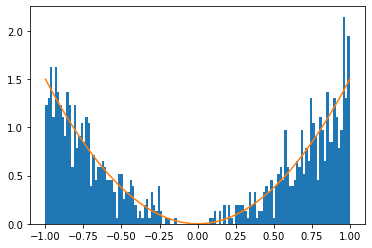

In [21]:
f_x=lambda x: 3*x**2/2 if x>=-1 and x<=1 else 0 
#der
#xi=lambda u:u(xi_1)**1/3 if u<=0 else -(u(-xi_1)**1/3)
#xi_1= lambda 

xi = lambda u: -(-2*u+1)**(1/3) if u<.5 else (2*u-1)**(1/3)

f1 = lambda x: x**(1/3) if x>=0 else -(-x)**(1/3)
f2 = lambda u: f1(2*u-1)

N= 1000
u1= np.random.uniform(0,1,N)

muestra= list(map(lambda x:f2(x), u1))
muestra= np.asarray(muestra)
y, x, p= plt.hist(muestra, bins= 130, density=True)
y2= list(map(lambda x: f_x(x), x))
plt.plot(x,y2)
plt.show()

In [40]:
# Montecarlo
print('Media Montecarlo:',muestra.mean())
# print(muestra.max())


# Método estratificado
np.random.seed(100)
r1= np.random.uniform(0,.6,3)
r2= np.random.uniform(.6,.9,3)
r3= np.random.uniform(.9,1,4)

r=[r1,r2,r3]

m1 = (3/10)/.6
m2 = (3/10)/.3
m3 = (4/10)/.1

m=[m1,m2,m3]
w = [1/2,1,4]


muestra2= list(map(lambda x,a: np.asarray([f2(i) for i in x])/a,r,w))
media = np.concatenate(muestra2).mean()
print('Media Método Estratificado',media)

# Método completmentario
u1= np.random.rand(5)
u2= 1-u1
U = [u1,u2]
muestra4 = list(map(lambda u:np.asarray([f2(u) for u in x]), U))
muestra4 
print('Media Método Complementario:', np.concatenate(muestra4).mean())

Media Montecarlo: -0.004841203629884344
Media Método Estratificado -0.16346936901447945
Media Método Complementario: -0.6208102212155131


In [39]:
#Metodo estratificado para 2, 4, 6 y 10 estratos.

def variables_estratificadas(B):
    est = np.random.rand(B)
    i = np.arange(0,B)
    v = (est+i)/B
    return v

N_estratos = [2, 4, 6, 10]
muestras = list(map(variables_estratificadas,N_estratos))
al = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))
m_estra = list(map(lambda i:np.mean(i),al))

imp = list(map(lambda b,mean:print('Estimación de la media para %i estratos es %2.4f'%(b,mean)),N_estratos,m_estra))

Estimación de la media para 2 estratos es 0.0280
Estimación de la media para 4 estratos es -0.0667
Estimación de la media para 6 estratos es -0.0612
Estimación de la media para 10 estratos es -0.0161


>En conclusión, observando los resultados de esta simulación, en comparación con los métodos montecarlo, estratificado con los tres estratos especificados anteriormente y el método complementario, los estratos 4, 6 y 10 (en este caso) la media es menor, sin embargo la menor de todas en el método montecarlo. Cabe mencionar que, en 2 estratos, la media es positiva, al contrario de las otras estimaciones.

## Sol 1 Daniel Castillo

## Sol 2 Daniel Castillo